## STOCHASTIC MODELING
MODULE 3 | LESSON 1


---


# **INTEREST RATE MODELS** 


|  |  |
|:---|:---|
|**Reading Time** |  40 minutes |
|**Prior Knowledge** | Vasicek model, Monte Carlo  |
|**Keywords** | Vasicek, CIR, Simulation |


---

*In Lesson 1 of Module 3 of Stochastic Modeling, we will look at interest rate models. First, we will revisit the Vasicek (1977) model, which we already introduced in the Derivative Pricing course. Second, we will study Cox-Ingersoll-Ross model of 1985, famously known as CIR. Finally, we will use Monte Carlo to compare the different short rate paths simulated by both models.*

As usual, let's start with importing the necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## **1. Vasicek (1977) Model**

We already know the form of Vasicek (1977) SDE and how to implement it in Python. Please go back to Module 4 in Derivative Pricing if you need a refresher on this.

The risk-neutral process for short rates in Vasicek (1977) is given by:
$$
\
\begin{equation*}
  dr_t = k(\theta-r_t)dt + \sigma dz_t
\end{equation*}
$$
\
where $dz_t = \sqrt{dt} z$, with $z \sim \mathcal{N}(0,1)$. 

In [2]:
def vasicek(r0, k, theta, sigma, T, N, M):
    dt = T / N
    rates = np.zeros((N, M))
    rates[0, :] = r0
    for j in range(M):
        for i in range(1, N):
            dr = (
                k * (theta - rates[i - 1, j]) * dt
                + sigma * np.sqrt(dt) * np.random.normal()
            )
            rates[i, j] = rates[i - 1, j] + dr
    return rates

Using this function, and some exogenously given parameters for $k$, $\theta$, $\sigma$ and $r_0$, let's simulate 100 price paths that take 100 steps in 1 year:

- $r_0 = 2.3\%$
- $k = 0.2$
- $\theta = 0.01$
- $\sigma = 0.012$<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

In [4]:
M = 100  # Number of paths for MC
N = 100  # Number of steps
T = 1.0  # Maturity
r0 = 0.023
k = 0.20
theta = 0.01
sigma = 0.012
t = np.linspace(0, T, N)

rates = vasicek(r0, k, theta, sigma, T, N, M)

And plot the different paths...

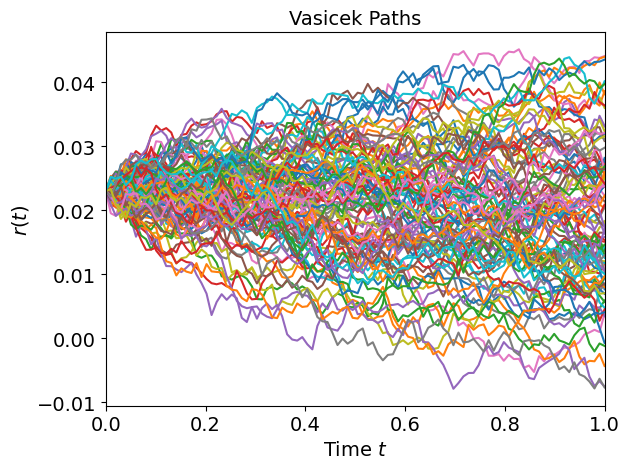

In [5]:
for j in range(M):
    plt.plot(t, rates[:, j])

plt.xlabel("Time $t$", fontsize=14)
plt.ylabel("$r(t)$", fontsize=14)
plt.title("Vasicek Paths", fontsize=14)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


## **2. Cox-Ingersoll-Ross (1985) Model**

Now, let's undergo the same process with the CIR (1985) model, which is not so familiar to us, although it simply involves a small switch from Vasicek's SDE.

CIR (1985) model SDE has the following form:
$$
\
\
\begin{equation*}
  dr_t = k_r(\theta_r-r_t)dt + \sigma_r \sqrt{r_t} dz_t
\end{equation*}
$$

So, with just a couple small tweaks to the Vasicek (1977) function, we can get the one for CIR (1985):

In [ ]:
def cir(r0, k, theta, sigma, T, N, M):
    dt = T / N
    rates = np.zeros((N, M))
    rates[0, :] = r0
    for j in range(M):
        for i in range(1, N):
            dr = (
                k * (theta - rates[i - 1, j]) * dt
                + sigma
                * np.sqrt(dt)
                * np.sqrt(np.maximum(rates[i - 1, j], 0))
                * np.random.normal()
            )
            rates[i, j] = rates[i - 1, j] + dr
    return rates

Note that we have included a truncation on the $\sqrt{r_t}$ component just to ensure that we do not get an error for $r_t<0$.

Obtain the short rates simulated:

In [ ]:
rates_cir = cir(r0, k, theta, sigma, T, N, M)

And, finally, plot them.

In [ ]:
for j in range(M):
    plt.plot(t, rates_cir[:, j])

plt.xlabel("Time $t$", fontsize=14)
plt.ylabel("$r(t)$", fontsize=14)
plt.title("CIR Paths", fontsize=14)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

## **3. Comparison of Vasicek (1977) and CIR (1985)**

Finally, let's compare the short rate paths generated by both models. In order to do so, let's graph them against each other:

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.plot(t, rates[:, :])
plt.xlabel("Time $t$", fontsize=10)
plt.ylabel("$r(t)$", fontsize=10)
plt.title("Vasicek Paths", fontsize=10)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(132)
plt.plot(t, rates_cir[:, :])
plt.xlabel("Time $t$", fontsize=10)
plt.ylabel("$r(t)$", fontsize=10)
plt.title("CIR Paths", fontsize=10)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(133)
plt.plot(t, rates[:, 1:], "b")
plt.plot(t, rates[:, 0], "b", label="Vasicek")
plt.plot(t, rates_cir[:, 1:], "r--")
plt.plot(t, rates_cir[:, 0], "r--", label="CIR")
plt.legend()
plt.xlabel("Time $t$", fontsize=10)
plt.ylabel("$r(t)$", fontsize=10)
plt.title("Both Paths", fontsize=10)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

As you can see, at first sight, mainly because of axis dimensions, it was difficult to actually observe huge differences between the Vasicek and CIR generated paths. However, these differences become pretty clear in the last one of these graphs where we plot both models' paths against each other. We do observe that CIR short rate paths tend to vary much less than what Vasicek paths do. 

**Does this make sense?** Well, if you look at the actual SDEs and think about it, it does! Basically because, the way we are currently doing things, the volatility term of $\sigma \sqrt{r_t}$ in CIR is, by construction, always smaller than the volatility term in Vasicek (simply $\sigma$). Essentially, the volatility term in CIR is the volatility term in Vasicek times a number lower than 1, which results in a strictly lower volatility term.

**Is this correct then?** No, it is not! For starters, there is a reason why we named the volatility terms differently ($\sigma$ and $\sigma_r$): these are not the same parameter. Secondly, we need to carefully consider how we treat $\sqrt{r_t}$ since this is a squared-root process and discretized versions have to be considered.

**How do I get these parameters then?** That is precisely what we will do in the next lesson, perform market calibration of interest models. As you will see there, we will get completely different estimates for $\sigma$ and $\sigma_r$, as we should.
\

## **4.Conclusion**

In this lesson, we briefly revisited the Vasicek (1977) interest rate model and enhanced it by introducing the Cox-Ingersoll-Ross (1985) model. For these two models, we have applied Monte-Carlo methods to simulate the different short rate paths that each generates, only to realize that without proper parameter calibration, a comparison of the models does not make much sense from a practical perspective. In the next lesson, we will go over the calibration process for interest rate models.

\
**References**

- Cox, John C., et al. "An Intertemporal General Equilibrium Model of Asset Prices." *Econometrica: Journal of the Econometric Society*, 1985, pp. 363-384.


---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
